In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
data=load_digits()

In [4]:
dataset=pd.DataFrame(data.data, columns=data.feature_names)
dataset["target"]=data.target
dataset.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [10]:
from sklearn.model_selection import train_test_split
x=dataset.drop("target", axis=1)
y=dataset["target"]
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3)

<h1> variance threshold </h1>

In [11]:
from sklearn.feature_selection import VarianceThreshold

In [12]:
vt=VarianceThreshold(threshold=0)
vt.fit(x_train, x_test)


VarianceThreshold(threshold=0)

In [21]:
vt.get_support().sum()

61

In [24]:
selected_cols=x_train.columns[vt.get_support()]

In [26]:
x_train=x_train[selected_cols]
x_train.shape

(1257, 61)

<h1> pearsion corelation </h1>

In [42]:
from sklearn.datasets import load_digits
data=load_digits()
dataset=pd.DataFrame(data.data, columns=data.feature_names)
dataset["target"]=data.target
dataset.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [43]:
from sklearn.model_selection import train_test_split
x=dataset.drop("target", axis=1)
y=dataset["target"]
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3)

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
core=x_train.corr()
core

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
pixel_0_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel_0_1,NaN,1.000000,0.566305,0.209460,-0.011514,0.070606,0.059466,-0.034147,0.029773,0.577120,...,0.025175,-0.048388,NaN,0.863644,0.568246,0.154967,-0.110701,-0.038938,0.025420,-0.043222
pixel_0_2,NaN,0.566305,1.000000,0.551447,-0.074567,0.059300,0.010926,-0.064065,0.024112,0.595459,...,0.035942,-0.013554,NaN,0.531145,0.940579,0.498415,-0.143669,-0.066512,0.050710,0.073899
pixel_0_3,NaN,0.209460,0.551447,1.000000,0.024392,-0.175802,-0.119653,-0.055724,0.038531,0.319974,...,0.133072,0.075598,NaN,0.180426,0.550404,0.758999,-0.064387,-0.065539,0.032864,0.089122
pixel_0_4,NaN,-0.011514,-0.074567,0.024392,1.000000,0.502202,0.123576,-0.025454,0.044788,0.021240,...,-0.242314,-0.167852,NaN,-0.044241,-0.027694,-0.017404,-0.070423,-0.200783,-0.228338,-0.168837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_7_3,NaN,0.154967,0.498415,0.758999,-0.017404,-0.063864,-0.041450,-0.002726,0.047911,0.294325,...,0.093624,0.036258,NaN,0.130982,0.481709,1.000000,0.063151,-0.102597,-0.023820,0.087608
pixel_7_4,NaN,-0.110701,-0.143669,-0.064387,-0.070423,-0.318981,-0.371265,-0.159614,0.054062,0.005652,...,0.386558,0.088369,NaN,-0.117374,-0.216099,0.063151,1.000000,0.604195,0.226640,0.095191
pixel_7_5,NaN,-0.038938,-0.066512,-0.065539,-0.200783,-0.247543,-0.287773,-0.124280,0.029673,0.073337,...,0.712772,0.249613,NaN,-0.049109,-0.111441,-0.102597,0.604195,1.000000,0.646487,0.253304
pixel_7_6,NaN,0.025420,0.050710,0.032864,-0.228338,-0.253895,-0.170126,-0.056894,0.016237,0.122233,...,0.615432,0.498271,NaN,0.012033,0.014901,-0.023820,0.226640,0.646487,1.000000,0.608523


<Axes: >

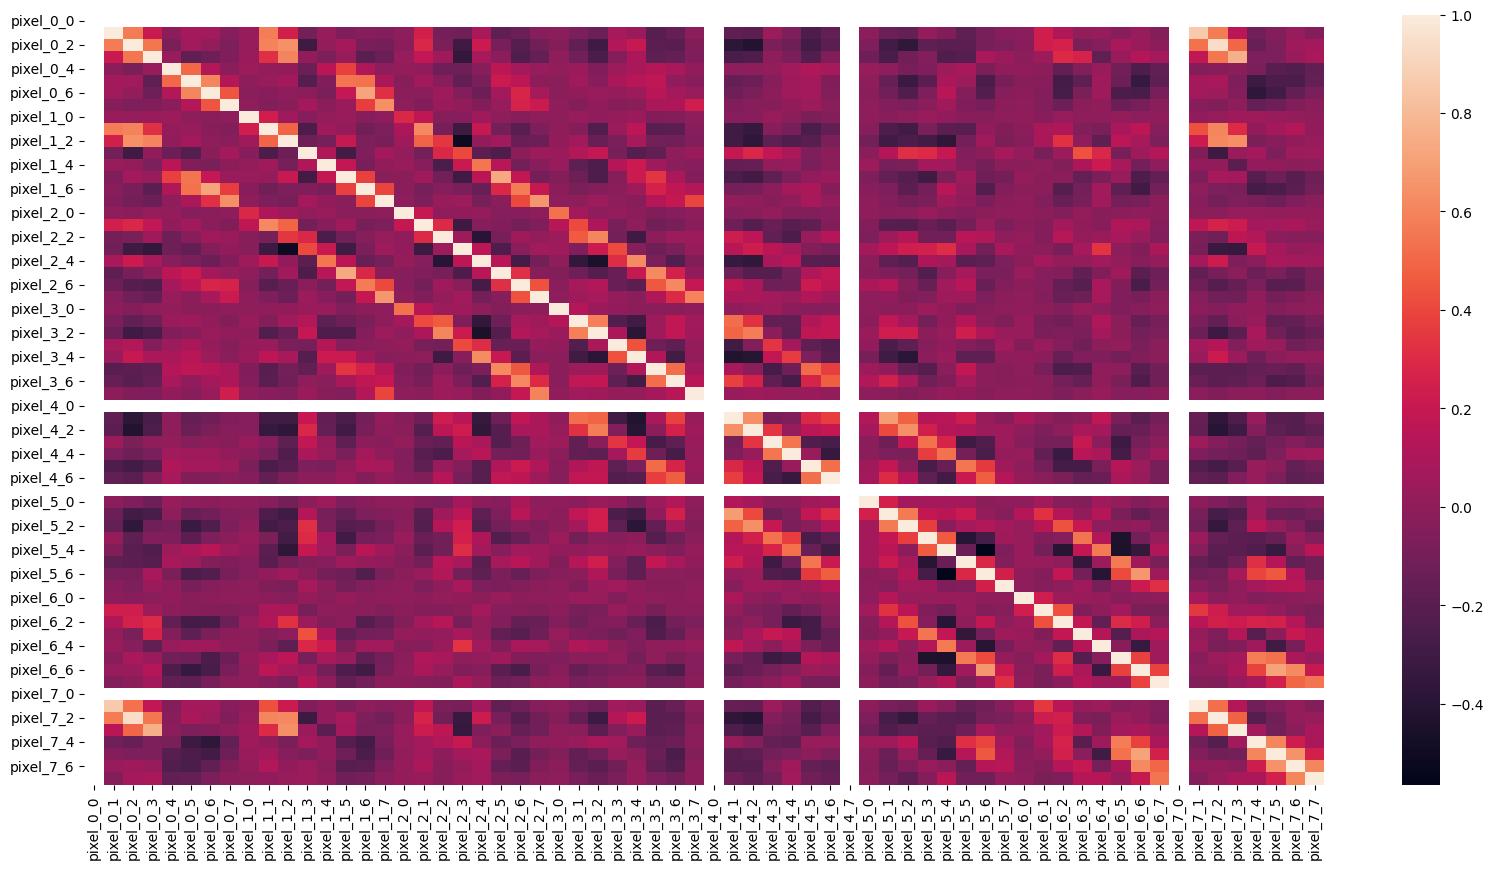

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(core)

In [47]:
highly_corelated=set()
threshold=0.8
for i in core.columns:
    for j in core.columns:
        if(i!=j and core.loc[i,j]>threshold):
            highly_corelated.add(i)
highly_corelated
# following features are highly corelated, we will drop them

{'pixel_0_1', 'pixel_0_2', 'pixel_7_1', 'pixel_7_2'}

In [48]:
x_train=x_train.drop(highly_corelated, axis=1)


In [49]:
x_train.shape

(1257, 60)

<h1> mutual_information classification  and mutual inforation regression  </h1>

In [ ]:
both work in the same way, but classification used when target var is of discrete type
and regression is used when it is of continus type

In [105]:
from sklearn.datasets import load_digits
data=load_digits()
dataset=pd.DataFrame(data.data, columns=data.feature_names)
dataset["target"]=data.target
dataset.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [106]:
dataset["target"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [107]:
from sklearn.model_selection import train_test_split
x=dataset.drop("target", axis=1)
y=dataset["target"]
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=0)

In [108]:
from sklearn.feature_selection import mutual_info_classif

In [109]:
mic=mutual_info_classif(x_train, y_train)
mic

array([0.00585206, 0.15043929, 0.3374519 , 0.19265892, 0.17751353,
       0.27152003, 0.2237028 , 0.01841335, 0.        , 0.24125841,
       0.34178841, 0.12839276, 0.20721472, 0.35326251, 0.13710798,
       0.04262498, 0.01907955, 0.1749191 , 0.26173921, 0.27596696,
       0.37649485, 0.43061763, 0.22336577, 0.02171277, 0.        ,
       0.29293816, 0.46199839, 0.29669773, 0.36654211, 0.28282221,
       0.39708611, 0.01543203, 0.        , 0.42146086, 0.4661625 ,
       0.31626611, 0.3827436 , 0.26215223, 0.35386291, 0.01648751,
       0.        , 0.30520898, 0.42124389, 0.40885344, 0.30965324,
       0.22837555, 0.29721433, 0.02260454, 0.        , 0.08129291,
       0.23758305, 0.25539801, 0.19923017, 0.30232793, 0.36901355,
       0.05271237, 0.01025315, 0.11100114, 0.33872749, 0.19796261,
       0.28569582, 0.3780563 , 0.28083642, 0.06157692])

In [110]:
data=pd.Series(mic)
data.index=x_train.columns
data.sort_values(ascending=False)

pixel_4_2    0.466162
pixel_3_2    0.461998
pixel_2_5    0.430618
pixel_4_1    0.421461
pixel_5_2    0.421244
               ...   
pixel_6_0    0.000000
pixel_5_0    0.000000
pixel_3_0    0.000000
pixel_1_0    0.000000
pixel_4_0    0.000000
Length: 64, dtype: float64

In [71]:
from sklearn.feature_selection import SelectKBest

In [72]:
skb=SelectKBest(mutual_info_classif, k=63)
skb.fit(x_train, y_train)

SelectKBest(k=63,
            score_func=<function mutual_info_classif at 0x00000299260E7BA0>)

In [73]:
skb.scores_

array([0.01967002, 0.10114456, 0.3530699 , 0.18763743, 0.16821966,
       0.26388002, 0.21460284, 0.02064708, 0.0223084 , 0.274031  ,
       0.32939635, 0.13487716, 0.20313123, 0.34474199, 0.14342979,
       0.00189719, 0.        , 0.19853599, 0.23606769, 0.31809439,
       0.35755147, 0.46725184, 0.22491152, 0.01031859, 0.        ,
       0.26881907, 0.40305944, 0.29709897, 0.37899555, 0.31656029,
       0.37318688, 0.        , 0.        , 0.45946941, 0.43277133,
       0.30211   , 0.35283985, 0.25604821, 0.33941056, 0.02410859,
       0.0137384 , 0.25731506, 0.39271353, 0.40083656, 0.30871284,
       0.17278601, 0.31361599, 0.02451368, 0.        , 0.05589546,
       0.26767886, 0.28722592, 0.18150034, 0.36646767, 0.36170589,
       0.06808272, 0.01734776, 0.08708181, 0.36194693, 0.20405256,
       0.26844646, 0.40562123, 0.2833911 , 0.08890333])

In [84]:
best_50_cols=pd.DataFrame(skb.scores_, columns=["high_mutual_info"])
best_50_cols["faetures_names"]=x_train.columns
best_50_cols.nlargest(63,"high_mutual_info")

,high_mutual_info,faetures_names
21,0.467252,pixel_2_5
33,0.459469,pixel_4_1
34,0.432771,pixel_4_2
61,0.405621,pixel_7_5
26,0.403059,pixel_3_2
...,...,...
15,0.001897,pixel_1_7
16,0.000000,pixel_2_0
24,0.000000,pixel_3_0
31,0.000000,pixel_3_7
